# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython Kernel/Beyond Plain Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working With Markdown Cells.ipynb)
* [Rich Display System](../examples/IPython Kernel/Rich Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

In [3]:
!pip install numpy sklearn seaborn

tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
bleach 2.1.3 has requirement html5lib!=1.0b1,!=1.0b2,!=1.0b3,!=1.0b4,!=1.0b5,!=1.0b6,!=1.0b7,!=1.0b8,>=0.99999999pre, but you'll have html5lib 0.9999999 which is incompatible.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [5]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [7]:
def plot_boundary(probs):
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.show()

In [8]:
N = X.shape[0]
D = X.shape[1]
print(N, D)

200 2


In [9]:
# add a column of ones
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X[:]), axis=1)

In [10]:
Xb[:10]

array([[ 1.        ,  0.82944377,  0.87469415],
       [ 1.        , -1.35989641, -0.60275371],
       [ 1.        ,  0.35466551, -0.50966937],
       [ 1.        , -1.71088888,  1.38437071],
       [ 1.        , -1.07617622, -1.00007067],
       [ 1.        ,  0.47945457, -0.24220938],
       [ 1.        , -0.42490458,  2.08261939],
       [ 1.        ,  0.41906228, -0.2525939 ],
       [ 1.        , -0.38432027, -0.13768226],
       [ 1.        ,  1.31672259,  1.29342882]])

In [11]:
# randomly initialize the weights
w = np.random.randn(D + 1)

In [12]:
# calculate the model output
z = Xb.dot(w)

In [13]:
Y = sigmoid(z)

In [14]:
# let's do gradient descent 100 times
learning_rate = 0.01
losses = []
weights = []
for i in range(200):
    loss = cross_entropy(y, Y)
    if i % 10 == 0:
        print(loss)
    
    losses.append(loss)
    weights.append(w)
    # gradient descent weight udpate with regularization
    # w += learning_rate * ( np.dot((T - Y).T, Xb) - 0.1*w ) # old
    w += learning_rate * (Xb.T.dot(y - Y) - 0.1 * w)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

146.624345799
52.1243738128
50.265834121
49.7925606511
49.6170310112
49.5408309424
49.5043051216
49.4854263614
49.4750514682
49.4690560247
49.4654490413
49.463210251
49.4617878207
49.4608685692
49.4602672688
49.4598706051
49.4596074021
49.4594320558
49.4593149214
49.459236529


In [15]:
print("Final w:", w)

Final w: [-0.09115112 -1.04325947  3.14134503]


In [16]:
# add a column of ones
ones = np.ones((len(grid)))
grid_b = np.c_[ones.ravel(), xx.ravel(), yy.ravel()]

In [17]:
print(grid_b.shape)
z = grid_b.dot(w)
probs = sigmoid(z).reshape(xx.shape)
probs.shape

(1000000, 3)


(1000, 1000)

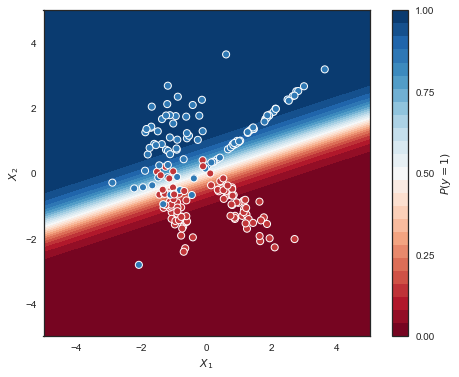

In [18]:
plot_boundary(probs)

Text(0.5,0,'hypothesis h(x)')

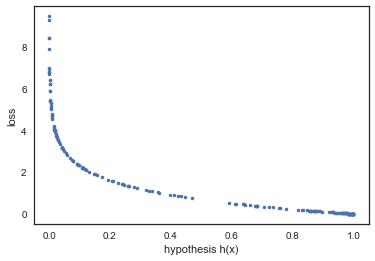

In [21]:
z = Xb.dot(w)
H = sigmoid(z)
losses = -np.log(H)
loss = cross_entropy(y, H)

plt.plot(H, losses, marker='.', linestyle='none')
plt.ylabel('loss')
plt.xlabel('hypothesis h(x)')

plotting line

In [24]:
loss

49.459187003394135